# Proyek Analisis Data: Bike-sharing-dataset

*   **Nama:** **Muhammad Irfan Adi Saputra**
*   **Email:** **M471D4KY2072@bangkit.academy**
*   **ID Dicoding:** muhammadirfanas07


### **Menentukan Pertanyaan Bisnis**

*   Bagaimana perbandingan rata-rata penyewaan sepeda antara hari kerja dan hari libur?
*   Berapa banyak jumlah rata-rata penyewaan sepeda tergantung dari cuacanya?
*   Bagaimana distribusi rata-rata penyewaan sepeda setiap bulannya?



## Import Semua Packages/Library yang Digunakan

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Wrangling

### Gathering Data

Memuat tabel day dari datasets Bike-sharing-datasets dan menampilkan 5 baris pertama dari DataFrame

In [201]:
day_dframe = pd.read_csv("https://raw.githubusercontent.com/kuninn/Bike-sharing-dataset/main/day.csv")
day_dframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


-

Memuat tabel hour dari datasets Bike-sharing-datasets dan menampilkan 5 baris pertama dari DataFrame

In [202]:
hour_dframe = pd.read_csv("https://raw.githubusercontent.com/kuninn/Bike-sharing-dataset/main/hour.csv")
hour_dframe.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


-

### Assessing Data

**Menilai Data Tabel day_dframe**

Memeriksa tipe data dari tabel day_dframe

In [203]:
day_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tabel dteday mungkin seharusnya bertipe data datetime daripada object


-

Memeriksa apakah ada missing value pada setiap kolom pada tabel day_dframe

In [204]:
day_dframe.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Sudah diperksa dan tidak ada missing value pada setiap kolom di tabel day_dframe

-

Memeriksa apakah ada data duplikat pada tabel day_dframe

In [205]:
cek_duplikat_day = day_dframe.duplicated().sum()
print("Jumlah data yang terduplikat pada tabel day_dframe: ", cek_duplikat_day)

Jumlah data yang terduplikat pada tabel day_dframe:  0


Tidak ada data duplikat pada tabel day_dframe

-

Memeriksa parameter statistik dari tabel day_dframe

In [206]:
day_dframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada data dari tabel day_dframe

**Menilai data tabel hour_dframe**

Memeriksa tipe data dari tabel hour_dframe

In [207]:
hour_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


tabel dteday mungkin seharusnya bertipe data datetime daripada object


-

Memeriksa apakah ada missing value pada setiap kolom pada tabel hour_dframe

In [208]:
hour_dframe.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Sudah diperksa dan tidak ada missing value pada setiap kolom di tabel hour_dframe

-

Memeriksa apakah ada data duplikat pada tabel hour_dframe

In [209]:
cek_duplikat_hour = hour_dframe.duplicated().sum()
print("Jumlah data yang terduplikat pada tabel day_dframe: ", cek_duplikat_hour)

Jumlah data yang terduplikat pada tabel day_dframe:  0


Tidak ada data duplikat pada tabel hour_dframe

-

Memeriksa parameter statistik dari tabel hour_dframe

In [210]:
hour_dframe.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan pada data dari tabel hour_dframe

### Cleaning Data

Mengubah tipe data dteday pada tabel day_dframe dari object menjadi datetime

In [211]:
dteday_col =["dteday"]

for coloumn in dteday_col:
  day_dframe[coloumn] = pd.to_datetime(day_dframe[coloumn])

Memeriksa kembali apakah data sudah sesuai

In [212]:
day_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Data sudah sesuai

-

Mengubah tipe data dteday pada tabel hour_dframe dari object menjadi datetime

In [213]:
dteday_col = ["dteday"]

for column in dteday_col:
    hour_dframe[column] = pd.to_datetime(hour_dframe[column])


Memeriksa kembali apakah data sudah sesuai

In [214]:
hour_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Data sudah sesuai

## Exploratory Data Analysis (EDA)

### Explore ..

melihat rangkuman parameter statistik dari tabel day_dframe

In [215]:
day_dframe.describe(include="all")

<ipython-input-215-64066efd928b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_dframe.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Menggabungkan data dari day_dframe dan hour_dframe

In [216]:
data_dframe_merge = pd.merge(
    left=hour_dframe,
    right=day_dframe,
    how="outer",
)
data_dframe_merge.head() #menampilkan 5 bari pertama

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0.0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1.0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2.0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3.0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4.0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


-

Menambahkan identitas pada nilai bulan

In [217]:
month_idn = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "Mei",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}

data_dframe_merge["month_idn"] = data_dframe_merge["mnth"].map(month_idn)

Memberikan identitas pada weathersit

In [218]:
weth_idn = {
    1: "Cerah",
    2: "Cerah Berawan",
    3: "Mendung",
    4: "Gerimis"
}

data_dframe_merge["weth_idn"] = data_dframe_merge["weathersit"].map(weth_idn)

In [219]:
data_dframe_merge.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_idn,weth_idn
0,1,2011-01-01,1,0,1,0.0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Jan,Cerah
1,2,2011-01-01,1,0,1,1.0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Jan,Cerah
2,3,2011-01-01,1,0,1,2.0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Jan,Cerah
3,4,2011-01-01,1,0,1,3.0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Jan,Cerah
4,5,2011-01-01,1,0,1,4.0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Jan,Cerah


In [220]:
data_dframe_merge.describe(include="all")

<ipython-input-220-7a3afb92228f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_dframe_merge.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_idn,weth_idn
count,18110.000000,18110,18110.000000,18110.000000,18110.000000,17379.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110,18110
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,4
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mei,Cerah
freq,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1550,11876
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8354.006405,NaN,2.501436,0.502485,6.537051,11.546752,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,NaN,NaN
std,5180.771860,NaN,1.107045,0.500008,3.439213,6.914405,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954,NaN,NaN
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,3797.250000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,NaN,NaN


-

 Menghitung rata-rata jumlah penyewaan sepeda untuk setiap bulan, lalu mengurutkan hasilnya berdasarkan rata-rata tersebut secara menurun(dari terkecil ke terbesar)

In [221]:
data_dframe_merge.groupby(by="month_idn")['cnt'].mean().reset_index(0).sort_values(by='cnt', ascending=False)

,month_idn,cnt
11,Sep,462.245825
6,Jun,461.789333
1,Aug,456.986337
5,Jul,445.094194
8,Mei,427.981935
10,Oct,426.109716
0,Apr,359.511022
9,Nov,340.455578
7,Mar,298.267101
2,Dec,273.185761


-

Menghitung rata-rata jumlah penyewaan sepeda bergantung pada cuacanya lalu mengurutkan hasilnya berdasarkan rata-rata tersebut secara menurun(dari terkecil ke terbesar)

In [222]:
data_dframe_merge.groupby(by="weth_idn")['cnt'].mean().reset_index(0).sort_values(by='cnt', ascending=False)

,weth_idn,cnt
0,Cerah,387.009515
1,Cerah Berawan,374.203715
3,Mendung,136.250000
2,Gerimis,74.333333


-

Menghitung perbandingan rata-rata penyewaan sepeda antara hari kerja dan hari libur lalu mengurutkan hasilnya berdasarkan rata-rata tersebut secara menurun(dari terkecil ke terbesar)

In [223]:
data_dframe_merge.groupby(by=["weekday", "workingday"])['cnt'].mean().reset_index(0).sort_values(by='cnt', ascending=False)

,weekday,cnt
workingday,,
0,3,592.240000
1,4,381.366337
1,5,378.824085
1,2,369.598105
0,6,365.156286
1,3,364.639781
1,1,357.954792
0,0,340.642117
0,1,320.456989


## Visualization & Explanatory Analysis


### Pertanyaan 1:
- Bagaimana perbandingan rata-rata penyewaan sepeda antara hari kerja dan hari libur?

<ipython-input-224-c3a1fd64f49f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='Persentase', y='Hari', palette=warna, orient='h')


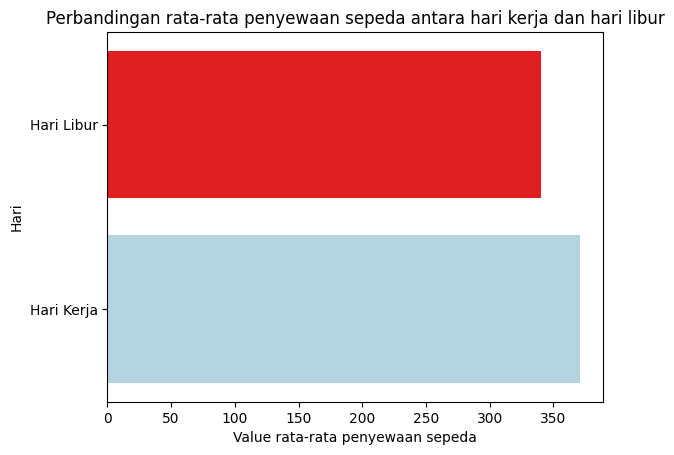

In [224]:
warna = ['red','lightblue']
total_workingday = data_dframe_merge[data_dframe_merge['workingday'] == 1]['cnt'].mean()
total_weekday = data_dframe_merge[data_dframe_merge['weekday'] == 0]['cnt'].mean()
plot_data = pd.DataFrame({
    'Hari': ['Hari Libur', 'Hari Kerja'],
    'Persentase': [total_weekday, total_workingday]
})
sns.barplot(data=plot_data, x='Persentase', y='Hari', palette=warna, orient='h')
plt.xlabel('Value rata-rata penyewaan sepeda')
plt.ylabel('Hari')
plt.title('Perbandingan rata-rata penyewaan sepeda antara hari kerja dan hari libur')
plt.show()


Rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur




-

### Pertanyaan 2:
- Berapa banyak jumlah rata-rata penyewaan sepeda tergantung dari cuacanya?

<ipython-input-225-2bbda976a5bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_dframe_merge, x='weathersit', y='cnt', palette=warna_2)


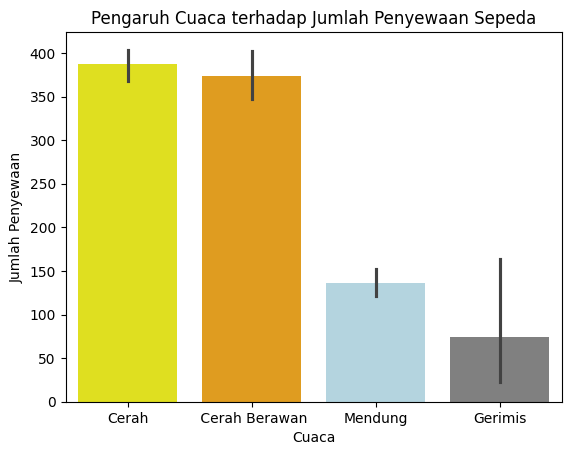

In [225]:
warna_2 = ['yellow','orange','lightblue', 'gray']
sns.barplot(data=data_dframe_merge, x='weathersit', y='cnt', palette=warna_2)
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ["Cerah", " Cerah Berawan", "Mendung", "Gerimis"])
plt.show()

Di sini cuaca memang sangat mempengaruhi jumlah rata-rata penyewaan, rata-rata sepeda disewa pada cuaca yang cerah dan sangat sedikit yang menyewa di cuaca gerimis.

-

### Pertanyaan 3:
- Bagaimana jumlah distribusi rata-rata penyewaan sepeda setiap bulannya?

<ipython-input-226-64252a9a60ab>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=avr_perbulan, x='month_idn', y='cnt', palette='viridis')


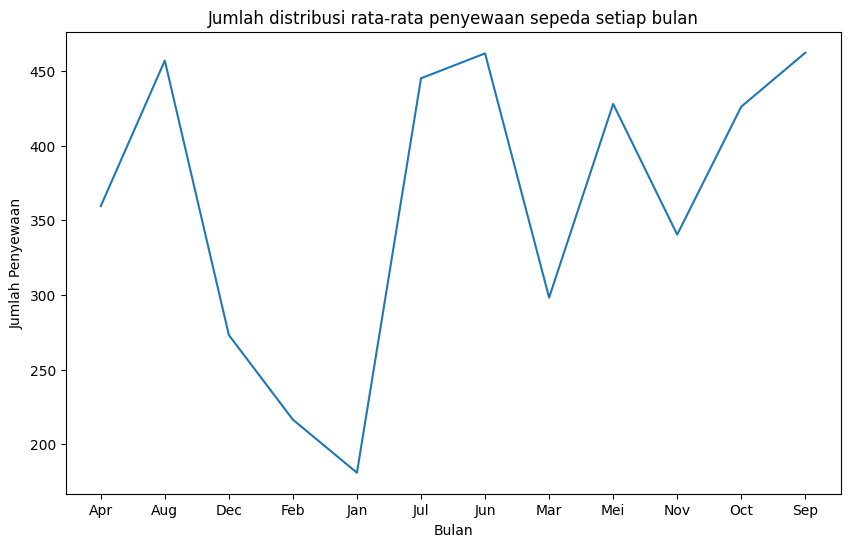

In [226]:
#data_dframe_merge['mnth'] = data_dframe_merge['dteday'].dt.month


avr_perbulan = data_dframe_merge.groupby('month_idn')['cnt'].mean().reset_index()
avr_perbulan = avr_perbulan.sort_values(by='month_idn')

plt.figure(figsize=(10, 6))
sns.lineplot(data=avr_perbulan, x='month_idn', y='cnt', palette='viridis')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah distribusi rata-rata penyewaan sepeda setiap bulan')
plt.show()


Jumlah Rata-rata penyewaan sepeda tertinggi ada di bulan agustus dan bulan juni, yang paling rendah ada di bulan januari

## Conclusion

*   **Conclution pertanyaan 1 :** Rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur, hal ini kemungkinan disebabkan oleh keadaan
jalanan yang macet pada jam sibuk tang membuat orang-orang cenderung menggunakan sepeda sebagai alternatif transportasi yang efisien karena lebih cepat. Faktor lainnya mungkin pada hari libur, mungkin orang cenderung menggunakan waktu luang mereka untuk rekreasi. Jadi pada hari kerja, sepeda sering dipilih karena efisiensinya, sementara pada hari libur, preferensi mungkin beralih ke sarana transportasi yang lebih santai.

*   **Conclution pertanyaan 2:** Di sini cuaca memang sangat mempengaruhi jumlah rata-rata penyewaan, rata-rata sepeda disewa pada cuaca yang cerah dan sangat sedikit yang menyewa di cuaca gerimis. Hal ini mungkin disebabkan karena cuaca cerah cenderung membuat pengalaman berkendara lebih menyenangkan dan nyaman. Sinar matahari yang terang dan langit yang cerah meningkatkan suasana hati dan membuat orang lebih termotivasi untuk bersepeda. Cuaca cerah biasanya berarti jalanan kering dan lebih aman untuk bersepeda. Di sisi lain, gerimis atau cuaca buruk dapat menciptakan kondisi jalan yang licin dan tidak nyaman, serta meningkatkan risiko kecelakaan.


*   **Conclution pertanyaan 3:** Jumlah Rata-rata penyewaan sepeda tertinggi ada di bulan agustus dan bulan juni, yang paling rendah ada di bulan januari. Hal ini mungkin disebabkan karena di negara 4 musim, Bulan Agustus dan Juni adalah bagian dari musim panas. Pada musim panas, cuaca cenderung lebih hangat dan cerah, menciptakan kondisi yang ideal untuk bersepeda dan aktivitas luar ruangan lainnya. Ini dapat meningkatkan minat orang untuk menyewa sepeda, terutama untuk rekreasi dan liburan, sedangkan bulan Januari biasanya terjadi musim dingin, dengan suhu yang lebih rendah dan kondisi cuaca yang kurang menguntungkan untuk bersepeda di luar ruangan. Kondisi cuaca yang buruk seperti hujan, salju, atau angin kencang dapat mengurangi minat orang untuk bersepeda, yang dapat menyebabkan penurunan permintaan penyewaan sepeda.




-

-

In [227]:
data_dframe_merge.to_csv("main_data.csv", index=False)